# 1D Clustering - Gaussian Mixture

This notebook mainly show examples implementing **Gaussian mixture model** (GMM) on 1D data, for 1D clustering, and the content briefly follows the documentation of astroML from [1D Gaussian Mixture Example](https://www.astroml.org/book_figures/chapter4/fig_GMM_1D.html).

We will run the GMM on two scenarios:
1. a distribution composed of 3 Gaussian distributions
2. a distribution composed of 4 Gaussian distributions, but one of them has outlier value with wider variation.

For each scenario, we will grid search **n_components** of [GMM](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html), and target the best GMM with mininal AIC. 

For explanation, we implemented the Python code from [1D Gaussian Mixture Example](https://www.astroml.org/book_figures/chapter4/fig_GMM_1D.html) to visualize the fitting outcome and how the grid search goes:

* **Left panel**: shows a histogram of the data, along with the best-fit model for a mixture with three components.
* **Centeral panel**: shows the model selection criteria AIC (see Section 4.3) and BIC (see Section 5.4) as a function of the number of components. Both are minimized for a three-component model. 
* **Right panel**: shows the probability that a given point is drawn from each class as a function of its position. For a given x value, the vertical extent of each region is proportional to that probability. Note that extreme values are most likely to belong to class 1.


## Reference

* [1D Gaussian Mixture Example](https://www.astroml.org/book_figures/chapter4/fig_GMM_1D.html)
* [[Youtube] Unsupervised Learning: Gaussian Mixture Model (1D GMM)](https://www.youtube.com/watch?v=fVsmnZqrBUs)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

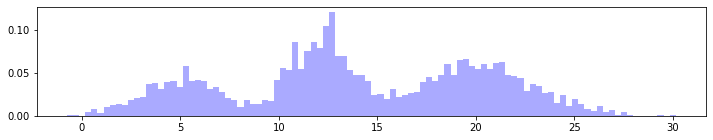

In [32]:
X = np.array(list(np.random.normal(5, 2, 500)) + 
                 list(np.random.normal(20, 3, 1000)) + 
                 list(np.random.normal(12, 1.5, 800))).reshape(-1, 1)

plt.figure(figsize=(12, 2))
plt.hist(data, bins=100, fc="#AAAAFF", density=True)
plt.show()

## Learn the Best-Fit Gaussian Mixture Models

Here we'll use scikit-learn's GaussianMixture model. The fit( ) method uses an Expectation-Maximization approach to find the best mixture of Gaussians for the data.

Note we grid search **n_components** = 1, 2,.... 10 (assume we don't know how many components in the distribution) and find the best GMM. Using above distributions, we expect the minimal AIC occurs at **n_components** = 3

In [33]:
N = np.arange(1, 11)

models = []
for i in range(len(N)):
    models.append(GaussianMixture(N[i]).fit(X))

# compute the AIC and the BIC
AIC = [m.aic(X) for m in models]
BIC = [m.bic(X) for m in models]

print (AIC)

best_GMM = models[np.argmin(AIC)]

[15089.997511973228, 14872.48706662124, 14458.82130008459, 14461.98129592719, 14470.107497947489, 14474.372906914818, 14485.38076571982, 14491.252485534093, 14492.240743725142, 14493.58095450308]


In [35]:
best_GMM

GaussianMixture(n_components=3)

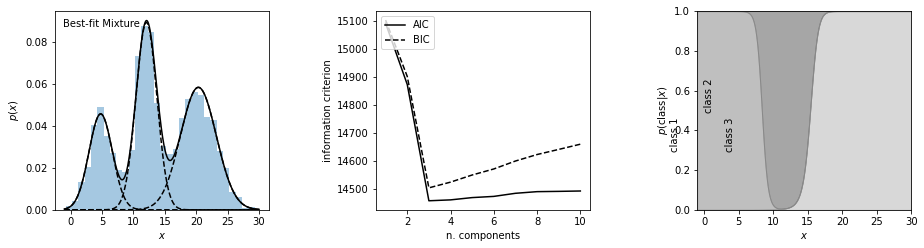

In [34]:
def plot_GMM(best_GMM, data):

    fig = plt.figure(figsize=(14, 4))
    fig.subplots_adjust(left=0.12, right=0.97,
                        bottom=0.21, top=0.9, wspace=0.5)

    # ----------------------------------------------
    # plot 1: data + best-fit mixture
    ax = fig.add_subplot(131)

    x = np.linspace(int(np.min(data))-1, int(np.max(data))+1, 1000)
    logprob = best_GMM.score_samples(x.reshape(-1, 1))
    responsibilities = best_GMM.predict_proba(x.reshape(-1, 1))
    pdf = np.exp(logprob)
    pdf_individual = responsibilities * pdf[:, np.newaxis]

    ax.hist(data, 30, density=True, histtype='stepfilled', alpha=0.4)
    ax.plot(x, pdf, '-k')
    ax.plot(x, pdf_individual, '--k')
    ax.text(0.04, 0.96, "Best-fit Mixture",
            ha='left', va='top', transform=ax.transAxes)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$p(x)$')


    # ----------------------------------------------
    # plot 2: AIC and BIC
    ax = fig.add_subplot(132)
    ax.plot(N, AIC, '-k', label='AIC')
    ax.plot(N, BIC, '--k', label='BIC')
    ax.set_xlabel('n. components')
    ax.set_ylabel('information criterion')
    ax.legend(loc=2)


    # ----------------------------------------------
    # plot 3: posterior probabilities for each component
    ax = fig.add_subplot(133)

    p = responsibilities
    p = p[:, (1, 0, 2)]  # rearrange order so the plot looks better
    p = p.cumsum(1).T

    ax.fill_between(x, 0, p[0], color='gray', alpha=0.3)
    ax.fill_between(x, p[0], p[1], color='gray', alpha=0.5)
    ax.fill_between(x, p[1], 1, color='gray', alpha=0.7)
    ax.set_xlim(int(np.min(data))-1, int(np.max(data))+1)
    ax.set_ylim(0, 1)
    ax.set_xlabel('$x$')
    ax.set_ylabel(r'$p({\rm class}|x)$')

    ax.text(-5, 0.3, 'class 1', rotation='vertical')
    ax.text(0, 0.5, 'class 2', rotation='vertical')
    ax.text(3, 0.3, 'class 3', rotation='vertical')

    plt.show()
    
plot_GMM(best_GMM, X)

## Scenario: Clustering 4 Distribution: 3 Normal + 1 Abnormal

Here I assume there is an abnormal Gaussian distribution with higher variation, whose values are likely higher than other three normal Gaussian distributions. The abnormal distribution plays a role like outlier events.

In this scenario, we expect the minimal AIC occurs at **n_components = 4**.

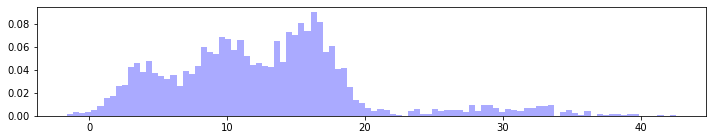

In [36]:
X2 = np.array(list(np.random.normal(4, 2, 500)) +
                 list(np.random.normal(10, 2, 800)) +
                 list(np.random.normal(16, 2, 1000)) + 
                 list(np.random.normal(30, 4, 200))).reshape(-1, 1)

plt.figure(figsize=(12, 2))
plt.hist(X2, bins=100, fc="#AAAAFF", density=True)
plt.show()

In [37]:
N = np.arange(1, 11)

models = []
for i in range(len(N)):
    models.append(GaussianMixture(N[i]).fit(X2))

# compute the AIC and the BIC
AIC = [m.aic(X2) for m in models]
BIC = [m.bic(X2) for m in models]

best_GMM2 = models[np.argmin(AIC)]

In [38]:
best_GMM2

GaussianMixture(n_components=4)

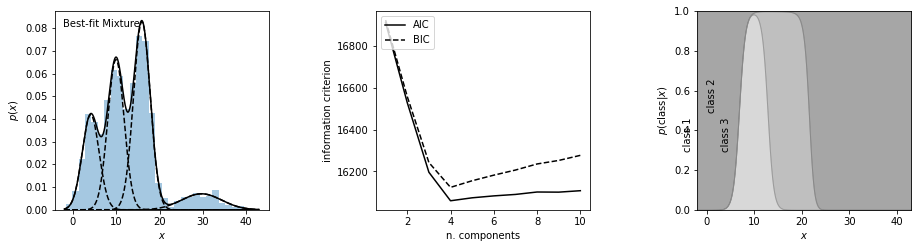

In [39]:
plot_GMM(best_GMM2, X2)